# Introduction
In this notebook, we are using the Keras API in Tensorflow 2.X to build an image classifier to recognize Handwritten digits using the Mnist data.

# Loading Tensorflow and checking the version

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.6.0


- If not installed, uncomment the following cell. 
- **PS:** using pip not conda as everything on colab is prepared for you (cuda).

In [ ]:
#!pip install tensorflow==2.5.0 

# Data Loading and exploring

In [ ]:
from tensorflow.keras.datasets import mnist

(training_images, training_labels),(testing_images, testing_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print("The number of training images is {}".format(training_images.shape[0]))
print("The number of testing images is {}".format(testing_images.shape[0]))
print("The shape of an image is {}X{}".format(training_images.shape[1],
                                              training_images.shape[2]))

The number of training images is 60000
The number of testing images is 10000
The shape of an image is 28X28


In [ ]:
import numpy as np
import random
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt

2


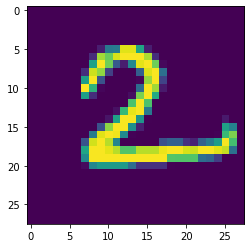

In [ ]:
img_number = random.randint(0, training_images.shape[0])
plt.imshow(training_images[img_number])
print(training_labels[img_number])

All of the pixels values are between 0 and 255. If we are training a neural network, for various reasons it's easier that all values are between 0 and 1.

This can be done using `normalizing`

In [ ]:
training_images  = training_images / 255.0
testing_images = testing_images / 255.0

# Defining the model using **Sequential** API

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
model = Sequential([Flatten(input_shape=(28,28)), 
                    Dense(128, activation=tf.nn.relu), 
                    Dense(10, activation=tf.nn.softmax)])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Define the **optimizer** and the **loss**

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train the model

In [ ]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 0.2605 - accuracy: 0.9261
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1128 - accuracy: 0.9670
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0763 - accuracy: 0.9774
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0570 - accuracy: 0.9828
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0444 - accuracy: 0.9861


Evaluate the model on the test images

In [ ]:
evaluation = model.evaluate(testing_images, testing_labels)
print("Accuracy on the testing images is {}".format(evaluation[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.0873 - accuracy: 0.9730
Accuracy on the testing images is 97.29999899864197


# Save and Load a Model

A model's architecture, weights, and training configuration can be saved in a single file/folder which allows accessing a model without the need for the python source code

*   SavedModel format
*   HDF5 format



## SavedModel format



In [ ]:
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [ ]:
from tensorflow.keras.models import load_model
new_model = load_model('saved_model/my_model')

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
evaluation = new_model.evaluate(testing_images, testing_labels)
print("Accuracy on the testing images is {}".format(evaluation[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.0873 - accuracy: 0.9730
Accuracy on the testing images is 97.29999899864197


## HDF5 format

A basic save format using the **HDF5** standard

In [ ]:
model.save('my_model.h5')

In [ ]:
from tensorflow.keras.models import load_model
new_model_h5 = load_model('my_model.h5')

# Check its architecture
new_model_h5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
evaluation = new_model_h5.evaluate(testing_images, testing_labels)
print("Accuracy on the testing images is {}".format(evaluation[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.0873 - accuracy: 0.9730
Accuracy on the testing images is 97.29999899864197
